

# 项目：检验心理学现象

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
<ul>
<li>在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。</li>
<li>研究这一现象是否存在</li>
<li>利用T-test假设检验</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipykernel import kernelapp as app
%matplotlib inline

### 数据整理
<a id='wrangling'></a>
### 常规属性

In [2]:
#加载csv文件
df = pd.read_csv('stroopdata.csv')
df.head() #查看前5列

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# 加载数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


<a id='eda'></a>
## 探索性数据分析

### 一、利用t-test假设检验来证明这一心理学现象确实存在


1、这里把一致性的试验作为自变量来使用（这种情况是人们常见，熟悉的状态，把这个作为对照，查看非一致性试验的结果的变化），而非一致性的试验作为因变量（这里把这种特殊的试验结果作为因变量去对照自变量的变化，时候有我们想找到的结论）
2、u0 = Congruent     u1 = Incongruent
3、零假设： u0 = u1
  对立假设：u0 < u1

In [5]:
df.Congruent.mean()

14.051125000000004

In [6]:
df.Incongruent.mean()

22.01591666666667

小结：比较两组试验结果总的平均值趋势,发现一致性试验的平均值小于非一直性试验的平均值。

In [7]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [8]:
stats.ttest_ind(df['Congruent'], df['Incongruent'],equal_var = True)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

结论：pvalue=4.5949e-08,pvalue<0.05,可以拒绝零假设，对立假设成立。

<a id='eda'></a>
### 二、探索数据集-同一样本两次试验分析

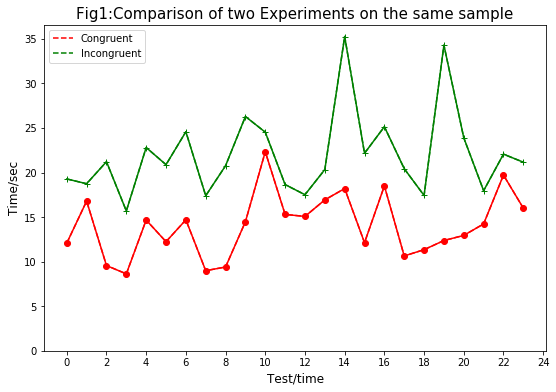

In [10]:
plt.figure(figsize=(9, 6))
x1=range(24)
y1=list(df.Congruent)
x2=range(24)
y2=list(df.Incongruent)

l1=plt.plot(x1,y1,'r--',label='Congruent') 
l2=plt.plot(x2,y2,'g--',label='Incongruent')
plt.plot(x1,y1,'ro-',x2,y2,'g+-')  
plt.title('Fig1:Comparison of two Experiments on the same sample',fontsize=15)  
plt.xlabel('Test/time',fontsize=12)  
plt.ylabel('Time/sec',fontsize=12)  
plt.xticks(np.arange(0, 25, 2),fontsize=10)
plt.yticks(np.arange(0, 40, 5),fontsize=10)
plt.legend()  
plt.show()  

可视化分析：本试验由于存在每个个体的差异，所以每次试验都是成对出现，每个样本进行两次试验，一次为一致性试验，一次为非一致性试验，试验结果绘制出Fig1。
1、个体差异确实对本试验的结果有影响，每个样本的测试结果的时间都不相同。
2、虽然个体有差异，如果把Congruent这一条线的当成一个基准，则Incongruent的结果都比本身Congruent的结果高出一些。

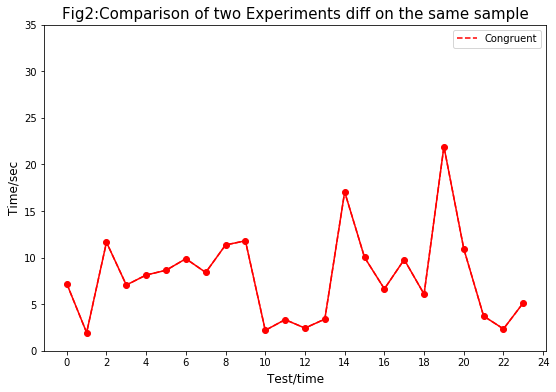

In [11]:
diff = df.Incongruent - df.Congruent
plt.figure(figsize=(9, 6))
x1=range(24)
y1=list(diff)

l1=plt.plot(x1,y1,'r--',label='Congruent') 
plt.plot(x1,y1,'ro-')  
plt.title('Fig2:Comparison of two Experiments diff on the same sample',fontsize=15)  
plt.xlabel('Test/time',fontsize=12)  
plt.ylabel('Time/sec',fontsize=12)  
plt.xticks(np.arange(0, 25, 2),fontsize=10)
plt.yticks(np.arange(0, 40, 5),fontsize=10)
plt.legend()  
plt.show()  

In [12]:
diff.mean()

7.964791666666667

从Fig2中可以看出一致性试验和非一致性试验时间上存在差异，差异平均值在7.9秒。

<a id='eda'></a>
### 三、探索数据集-两次试验的相关性分析

<Figure size 720x504 with 0 Axes>

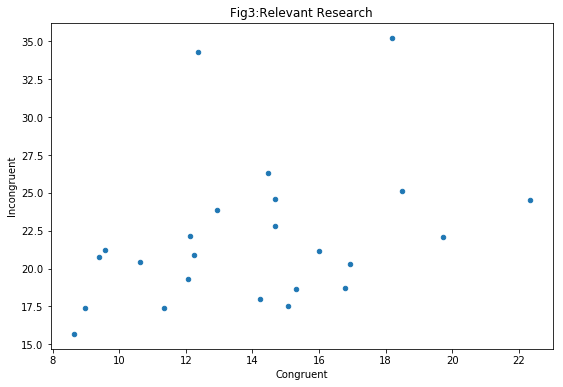

In [13]:
plt.figure(figsize=(10, 7))
df.plot.scatter(x = 'Congruent', y = 'Incongruent',figsize=(9, 6),title='Fig3:Relevant Research');
plt.show()

小结：从Fig3中可以看出一致性试验和非一致性试验存在相关性。

<a id='eda'></a>
> **小结**：1、从图中可以看出电影产业近些年发展迅速，电影收益随着年份的增长成稳定递增状态，预计未来会出品更优质的电影供人们品味。

注来源：
1、https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md
2、https://baike.baidu.com/item/t%E6%A3%80%E9%AA%8C#2